In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('drug200.csv')

In [3]:
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [4]:
#checking for the presence of null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.shape

(200, 6)

In [16]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [17]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [18]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:>

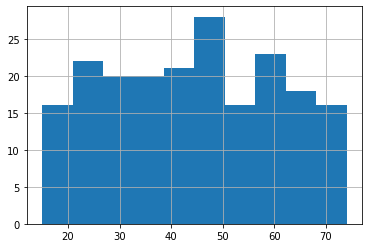

In [20]:
#plotting histograms to analyze distributions
df.Age.hist()

<AxesSubplot:>

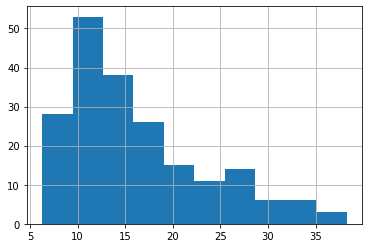

In [21]:
df.Na_to_K.hist()

In [26]:
#plotting bar plots for categorical variables
df_cat=df[['Sex','Age','BP','Cholesterol','Drug']]

graph for Sex : total=2


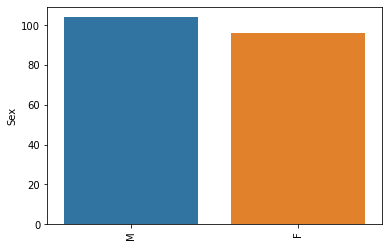

graph for Age : total=57


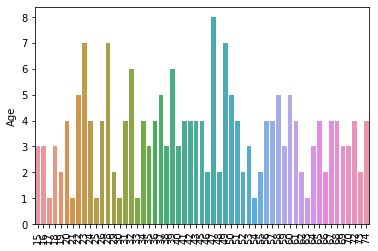

graph for BP : total=3


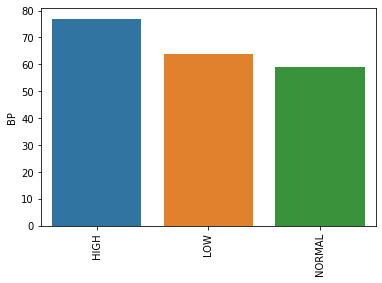

graph for Cholesterol : total=2


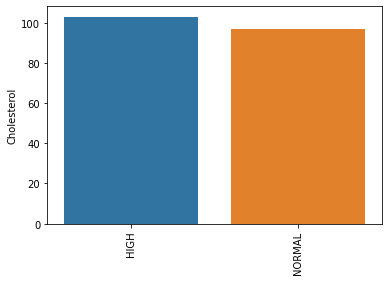

graph for Drug : total=5


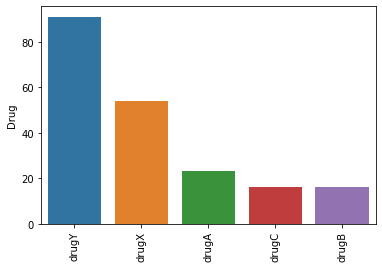

In [31]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print('graph for %s : total=%d' % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [50]:
#analyzing the groups of people who have high sodium to potassium ratio values
pd.pivot_table(df,index=['Age'],values='Na_to_K').sort_values('Na_to_K',ascending=False)

Na_to_K
Age           
33   33.486000
21   28.632000
63   25.917000
54   24.658000
58   23.507600
18   23.404667
65   22.995500
62   21.888500
52   21.408000
29   21.153000
46   20.985500
42   20.771500
38   19.832000
19   19.641000
25   19.011000
73   18.784500
34   18.320250
64   18.144667
31   17.633250
57   17.295500
28   17.021143
20   16.967000
41   16.959250
26   16.634250
51   16.559500
53   16.530333
23   16.497143
40   16.426000
24   16.080750
22   15.964600
47   15.779625
16   15.509667
43   15.393750
56   15.235750
61   15.075250
39   14.867000
37   14.776000
70   14.768333
68   14.634750
74   14.471000
15   14.338333
67   14.249000
36   13.716250
50   13.097800
59   12.754333
48   12.741000
69   12.332667
45   12.298000
32   12.290000
66   12.227000
60   12.224000
72   11.849500
17   10.832000
49   10.824857
30   10.443000
35    9.969667
55    9.119000

In [46]:
#analyzing variations in age and Na_to_K based on popularly used Drug 
pd.pivot_table(df,index=['Age','Drug'],values='Na_to_K').sort_values('Drug',ascending=False)

Na_to_K
Age Drug          
74  drugY  18.1890
38  drugY  24.0850
61  drugY  21.7590
31  drugY  23.7175
32  drugY  25.9740
...            ...
45  drugA  12.8540
24  drugA   9.4750
50  drugA   7.4900
26  drugA  12.3070
31  drugA  11.5490

[135 rows x 1 columns]

In [42]:
#analyzing the age groups in order of which age group requires highest usage of drugs
pd.pivot_table(df,index=['Age'],values='Drug',aggfunc='count').sort_values('Drug',ascending=False)

Drug
Age      
47      8
49      7
23      7
28      7
39      6
32      6
50      5
37      5
22      5
60      5
58      5
45      4
42      4
43      4
57      4
51      4
56      4
61      4
65      4
67      4
68      4
72      4
41      4
74      4
26      4
36      4
34      4
20      4
31      4
24      4
38      3
70      3
69      3
18      3
64      3
59      3
40      3
15      3
53      3
35      3
16      3
46      2
29      2
73      2
52      2
62      2
55      2
48      2
66      2
19      2
17      1
54      1
63      1
21      1
30      1
25      1
33      1

In [52]:
pd.pivot_table(df,index=['Sex'],values='Na_to_K').sort_values('Na_to_K',ascending=False)

Na_to_K
Sex           
F    17.022062
M    15.219029

In [53]:
df[['Age','Na_to_K']].corr()

Age   Na_to_K
Age      1.000000 -0.063119
Na_to_K -0.063119  1.000000